# Ensemble Learning
https://www.geeksforgeeks.org/stacking-in-machine-learning-2/
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

**Load files**

In [1]:
# %run DT_FINAL.ipynb

In [2]:
# %run IB_FINAL.ipynb

In [3]:
# %run B_FINAL.ipynb

In [4]:
# %run NN-FINAL.ipynb

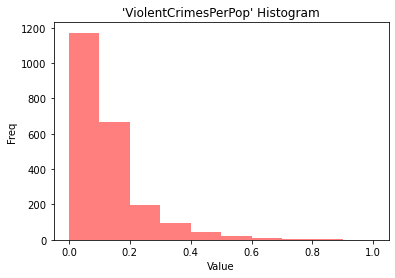

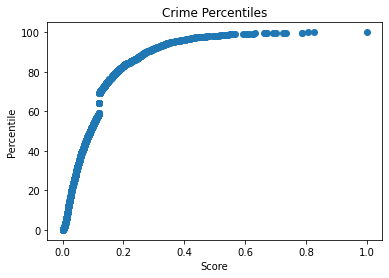

(1549, 100)
(332, 100)
(333, 100)


In [5]:
%run alt_Preprocessing.ipynb

In [6]:
# import packages
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [7]:
# Load training and validation test
x_train.head(5)
x_val.head(5)

,PctKids2Par,racePctWhite,PctKidsBornNeverMar,PctFam2Par,PctYoungKids2Par,pctWInvInc,PctTeen2Par,FemalePctDiv,PctPersOwnOccup,pctWPubAsst,...,indianPerCap,PctEmplManu,PolicCars,PolicReqPerOffic,PctEmplProfServ,OwnOccQrange,MedYrHousBuilt,agePct65up,LemasPctPolicOnPatr,LemasTotReqPerPop
471,0.852719,0.968644,0.040585,0.853037,0.870099,0.540310,0.874514,0.341760,0.898452,0.082885,...,0.012917,0.550021,0.052251,0.234794,0.283253,0.129909,0.479167,0.241831,0.856223,0.061316
741,0.914782,0.982259,0.021207,0.935013,0.959584,0.544155,0.861680,0.213904,0.918977,0.059140,...,0.012356,0.533347,0.052251,0.234794,0.276028,0.201813,0.666667,0.102328,0.856223,0.061316
816,0.754173,0.896545,0.044607,0.758035,0.924644,0.495615,0.720508,0.611084,0.543632,0.067428,...,0.044227,0.231763,0.052251,0.234794,0.230826,0.529305,0.791667,0.145764,0.856223,0.061316
1651,0.554120,0.730789,0.239488,0.590825,0.725082,0.281028,0.619004,0.316480,0.374745,0.171371,...,0.019450,0.244685,0.052251,0.234794,0.426639,0.144713,0.687500,0.151634,0.856223,0.061316
173,0.545504,0.631253,0.317367,0.606824,0.758160,0.338099,0.648691,0.288284,0.479774,0.168459,...,0.008621,0.165694,0.052251,0.234794,0.597443,0.132628,0.604167,0.159264,0.856223,0.061316


In [8]:
#For neural networks
def create_baseline():
        model = Sequential()
        model.add(Dense(60, activation='sigmoid', input_shape=(103, ))),
        model.add(Dense(30, activation='relu')),
        model.add(Dense(1, activation = 'sigmoid')),
        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
        return model

In [9]:
# Load models from files, but for now...
dt_model = DecisionTreeClassifier(ccp_alpha=0.01, random_state=40)
svm_model = SVC(kernel='linear', probability=True)
gnb_model = GaussianNB(priors=None, var_smoothing=1e-9)
# nn_model = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
# ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 103 but received input with shape (None, 100)


**Implement Stacking Classifier**

In [10]:
# Fit model
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[dt_model, svm_model, gnb_model], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

- use_probas = True indicates the Stacking Classifier uses the prediction probabilities as an input instead of using predictions classes.
- use_features_in_secondary = True indicates Stacking Classifier not only take predictions as an input but also uses features in the dataset to predict on new data.

In [11]:
# Train model
model_stack = clf_stack.fit(x_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(x_val)       # predictions on test data using stacked model

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
# Evaluate model
acc_stack = accuracy_score(y_val, pred_stack)  # evaluating accuracy
print('Accuray score of Stacked model:', acc_stack * 100)

Accuray score of Stacked model: 86.48648648648648


**Perform k-fold cross validation**

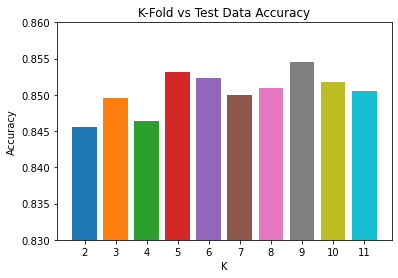

In [13]:
# Perform k-fold split on all data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(model_stack, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
    #print(f'Scores for each fold are: {score}')
    #print(f'Number of folds = {i} Average score: {"{:.2f}".format(score.mean())}')
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key)

plt.title('K-Fold vs Test Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.83, 0.86)
plt.show()

In [14]:
# Check k-fold split
kf =KFold(n_splits=9, shuffle=True, random_state=42)
score = cross_val_score(model_stack, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

# Good - most accurate and minimal variation



Scores for each fold are: [0.87398374 0.84552846 0.86178862 0.8495935  0.86585366 0.85365854
 0.85772358 0.82520325 0.85772358]
Average score: 0.85
Standard Deviation in score: 0.01
